Five cities were chosen:
1. Munich
2. Rotterdam
3. Frankfurt
4. Hamburg
5. Zurich


The dataset was devided in 17 chunks of 10 million entries devided to be able to read in the chunks and check those for data of the selected cities. It was fount that only chunk 2,3, 4 and 17 contained information about the five cities. In the code below, those four chunks will be read, the data that we are interested in will be collected, and then put together in a data frame called mt (short for multi-traffic).

In [1]:
# To select munich, rotterdam, frankfurt, hamburg, zurich
import pandas as pd
import numpy as np

In [ ]:
raw2=pd.read_csv('data/split/UTD19_chunk2.csv',dtype={'interval':np.int64,'detid':str,'flow':np.float64,'occ':np.float64,'error':np.float64,'city':str,'speed':np.float64})
raw2=raw2.loc[(raw2['city'] =='munich') | (raw2['city'] =='rotterdam')| (raw2['city'] =='frankfurt')| (raw2['city'] =='hamburg')|(raw2['city'] =='zurich')]

In [3]:
raw3=pd.read_csv('data/split/UTD19_chunk3.csv',dtype={'interval':np.int64,'detid':str,'flow':np.float64,'occ':np.float64,'error':np.float64,'city':str,'speed':np.float64})
raw3=raw3.loc[(raw3['city'] =='munich') | (raw3['city'] =='rotterdam')| (raw3['city'] =='frankfurt')| (raw3['city'] =='hamburg')|(raw3['city'] =='zurich')]

In [4]:
raw4=pd.read_csv('data/split/UTD19_chunk4.csv',dtype={'interval':np.int64,'detid':str,'flow':np.float64,'occ':np.float64,'error':np.float64,'city':str,'speed':np.float64})
raw4=raw4.loc[(raw4['city'] =='munich') | (raw4['city'] =='rotterdam')| (raw4['city'] =='frankfurt')| (raw4['city'] =='hamburg')|(raw4['city'] =='zurich')]

In [5]:
raw17=pd.read_csv('data/split/UTD19_chunk17.csv',dtype={'interval':np.int64,'detid':str,'flow':np.float64,'occ':np.float64,'error':np.float64,'city':str,'speed':np.float64})
raw17=raw17.loc[(raw17['city'] =='munich') | (raw17['city'] =='rotterdam')| (raw17['city'] =='frankfurt')| (raw17['city'] =='hamburg')|(raw17['city'] =='zurich')]

In [7]:
frames=[raw2,raw3,raw4,raw17]

In [9]:
mt=pd.concat(frames)

In [11]:
mt.shape
#nice! Veel kleiner

(23871075, 8)

In [12]:
mt.to_csv('five_cities_cleaned.csv')

## Exploratory data analyses

First let's check how many data we have from each city.

In [1]:
import pandas as pd
import numpy as np
mt=pd.read_csv('data/five_cities_cleaned.csv')

In [2]:
#check if import went well, seems ok
mt.head()

,Unnamed: 0,day,interval,detid,flow,occ,error,city,speed
0,7943139,2016-12-21,0,BP2_D1,24.0,0.004967,1.0,frankfurt,NaN
1,7943140,2016-12-21,300,BP2_D1,24.0,0.006900,1.0,frankfurt,NaN
2,7943141,2016-12-21,600,BP2_D1,12.0,0.003567,1.0,frankfurt,NaN
3,7943142,2016-12-21,900,BP2_D1,12.0,0.002667,1.0,frankfurt,NaN
4,7943143,2016-12-21,1200,BP2_D1,12.0,0.002267,1.0,frankfurt,NaN


In [3]:
#import nessacery packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

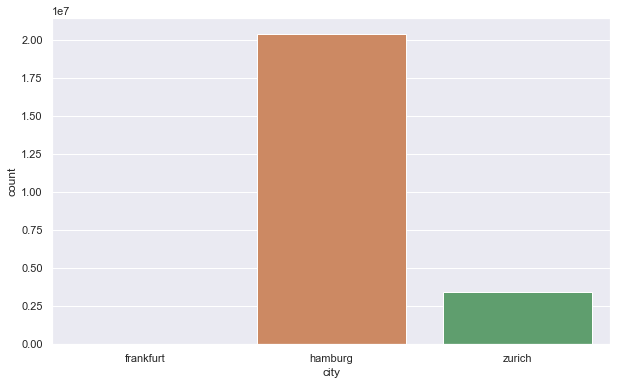

In [6]:
fig, ax = plt.subplots(figsize=(10,6)) # Create figure object
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax = sns.countplot(x="city", data=mt)

In [12]:
m=mt.loc[(mt['city'] =='frankfurt')]

In [18]:
m.shape

(30638, 9)

## Poging 2

Hierboven ging iets mis, want er is alleen data voor hamburg, zurich een frankfurt. Voor 2 steden ontbreekt dus data. Nieuwe strategie: verdeel bestand in 10 delen, laat loop alles inlezen en toevoegen aan 

In [28]:
df_m=pd.DataFrame()
df_r=pd.DataFrame()
df_f=pd.DataFrame()
df_h=pd.DataFrame()
df_z=pd.DataFrame()

In [31]:

cols_to_keep=['day','interval','detid','flow','occ','city']#alleen interssante kolommen importeren
dtype={'day':str,
       'interval':str,
       'detid':str,
       'flow':str,
       'occ':str,
       'city':str}#set all as string for now for import, change back later.

for i in range(1,11):
    f='data/split/UTD19_chunk'+str(i)+'.csv'
    df=pd.read_csv(f,usecols=cols_to_keep,dtype=dtype)
    #add to dataframes for each city
    df_m=pd.concat([df_m,df.loc[(df['city'] =='munich')]])
    df_r=pd.concat([df_r,df.loc[(df['city'] =='rotterdam')]])
    df_f=pd.concat([df_f,df.loc[(df['city'] =='frankfurt')]])
    df_h=pd.concat([df_h,df.loc[(df['city'] =='hamburg')]])
    df_z=pd.concat([df_z,df.loc[(df['city'] =='zurich')]])
    print(df_m.shape, df_r.shape,df_f.shape,df_h.shape,df_z.shape)


(0, 6) (0, 6) (0, 6) (0, 6) (0, 6)
(0, 6) (0, 6) (30638, 6) (15150017, 6) (0, 6)
(0, 6) (0, 6) (30638, 6) (20415435, 6) (0, 6)
(0, 6) (0, 6) (30638, 6) (20415435, 6) (0, 6)
(0, 6) (0, 6) (30638, 6) (20415435, 6) (0, 6)
(0, 6) (0, 6) (30638, 6) (20415435, 6) (0, 6)
(149270, 6) (351257, 6) (30638, 6) (20415435, 6) (0, 6)
(149270, 6) (351257, 6) (30638, 6) (20415435, 6) (0, 6)
(149270, 6) (351257, 6) (30638, 6) (20415435, 6) (0, 6)
(149270, 6) (351257, 6) (30638, 6) (20415435, 6) (3425002, 6)


Save all files with data for each city

In [32]:
df_m.to_csv('UTD_m.csv')

In [33]:
df_r.to_csv('UTD_r.csv')

In [34]:
df_f.to_csv('UTD_f.csv')

In [35]:
df_h.to_csv('UTD_h.csv')

In [36]:
df_z.to_csv('UTD_z.csv')

## Let's do some EDA

Text(0, 0.5, 'Counts')

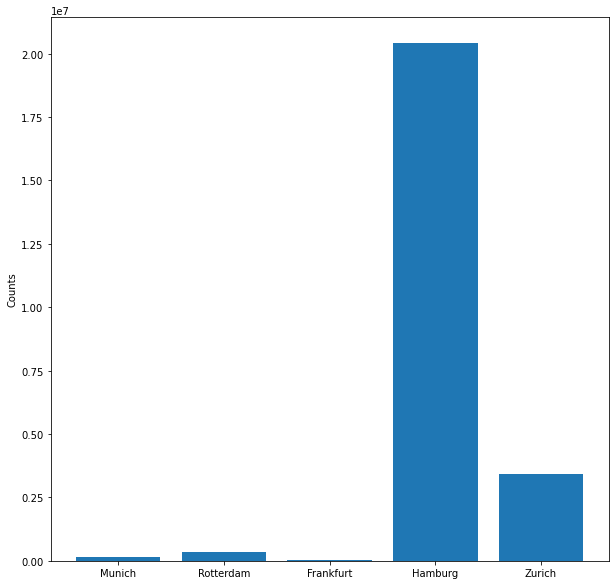

In [60]:
#import nessacery packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

x=[0,1,2,3,4]
y=[(len(df_m)),(len(df_r)),(len(df_f)),(len(df_h)),(len(df_z))]
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.xticks(np.arange(5),('Munich','Rotterdam','Frankfurt','Hamburg','Zurich'))
plt.bar(x,y)
plt.ylabel('Counts')

There is much more data available from Hamburg and Zurich than from the other cities.

Changing datatypes to numeric to be able to make some plots

In [65]:
df_m['interval'] = pd.to_numeric(df_m['interval'], errors='coerce')
df_m['occ'] = pd.to_numeric(df_m['occ'], errors='coerce')
df_m['flow'] = pd.to_numeric(df_m['flow'], errors='coerce')

df_r['interval'] = pd.to_numeric(df_r['interval'], errors='coerce')
df_r['occ'] = pd.to_numeric(df_r['occ'], errors='coerce')
df_r['flow'] = pd.to_numeric(df_r['flow'], errors='coerce')

df_f['interval'] = pd.to_numeric(df_f['interval'], errors='coerce')
df_f['occ'] = pd.to_numeric(df_f['occ'], errors='coerce')
df_f['flow'] = pd.to_numeric(df_f['flow'], errors='coerce')


df_h['interval'] = pd.to_numeric(df_h['interval'], errors='coerce')
df_h['occ'] = pd.to_numeric(df_h['occ'], errors='coerce')
df_h['flow'] = pd.to_numeric(df_h['flow'], errors='coerce')

df_z['interval'] = pd.to_numeric(df_z['interval'], errors='coerce')
df_z['occ'] = pd.to_numeric(df_z['occ'], errors='coerce')
df_z['flow'] = pd.to_numeric(df_z['flow'], errors='coerce')

Text(0.5, 0, 'Interval')

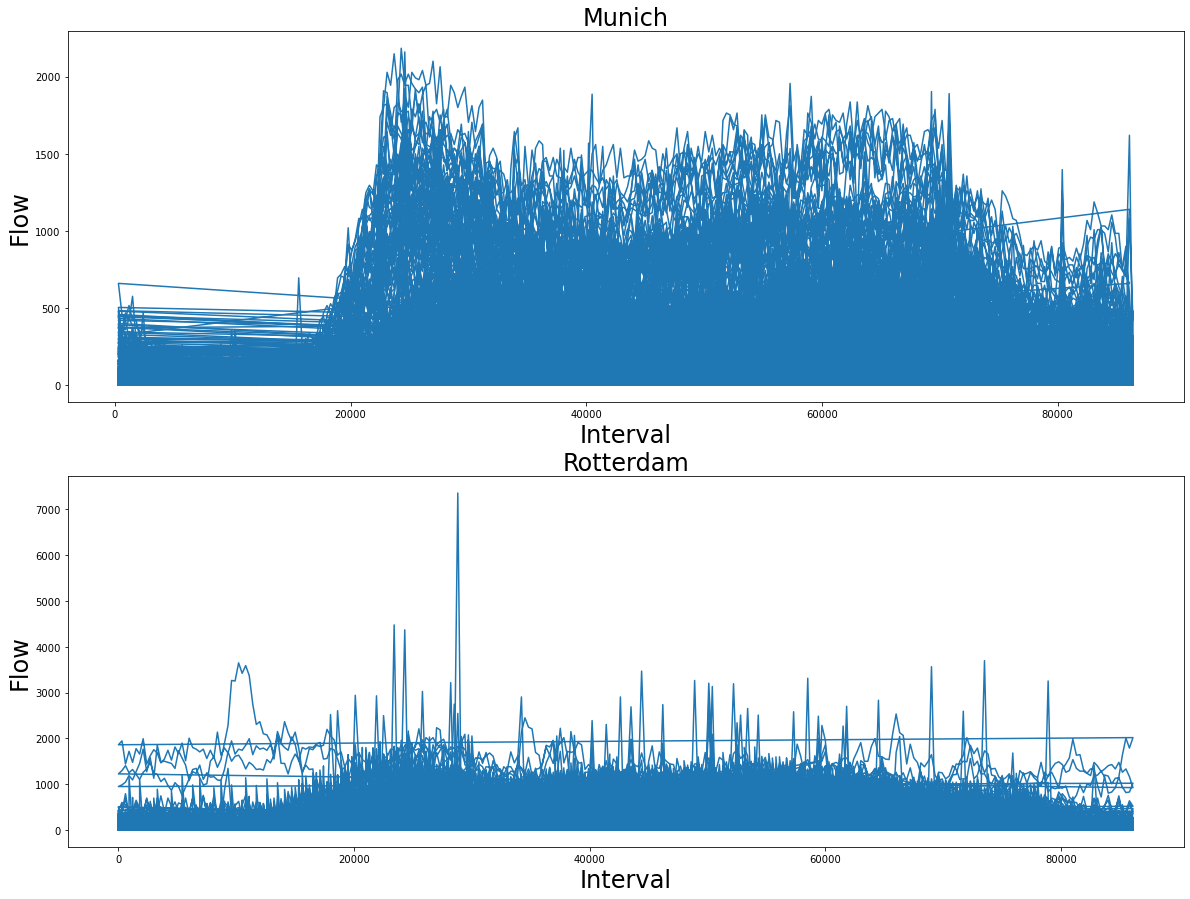

In [126]:
import seaborn as sns
fig, ax = plt.subplots(2,1,figsize=(20,15))

ax[0].plot(df_m['interval'], df_m['flow']);
ax[1].plot(df_r['interval'], df_r['flow']);

ax[0].set_title('Munich',fontsize=24)
ax[1].set_title('Rotterdam',fontsize=24)

ax[0].set_ylabel('Flow',fontsize=24)
ax[0].set_xlabel('Interval',fontsize=24)

ax[1].set_ylabel('Flow',fontsize=24)
ax[1].set_xlabel('Interval',fontsize=24)

Text(0.5, 0, 'Interval')

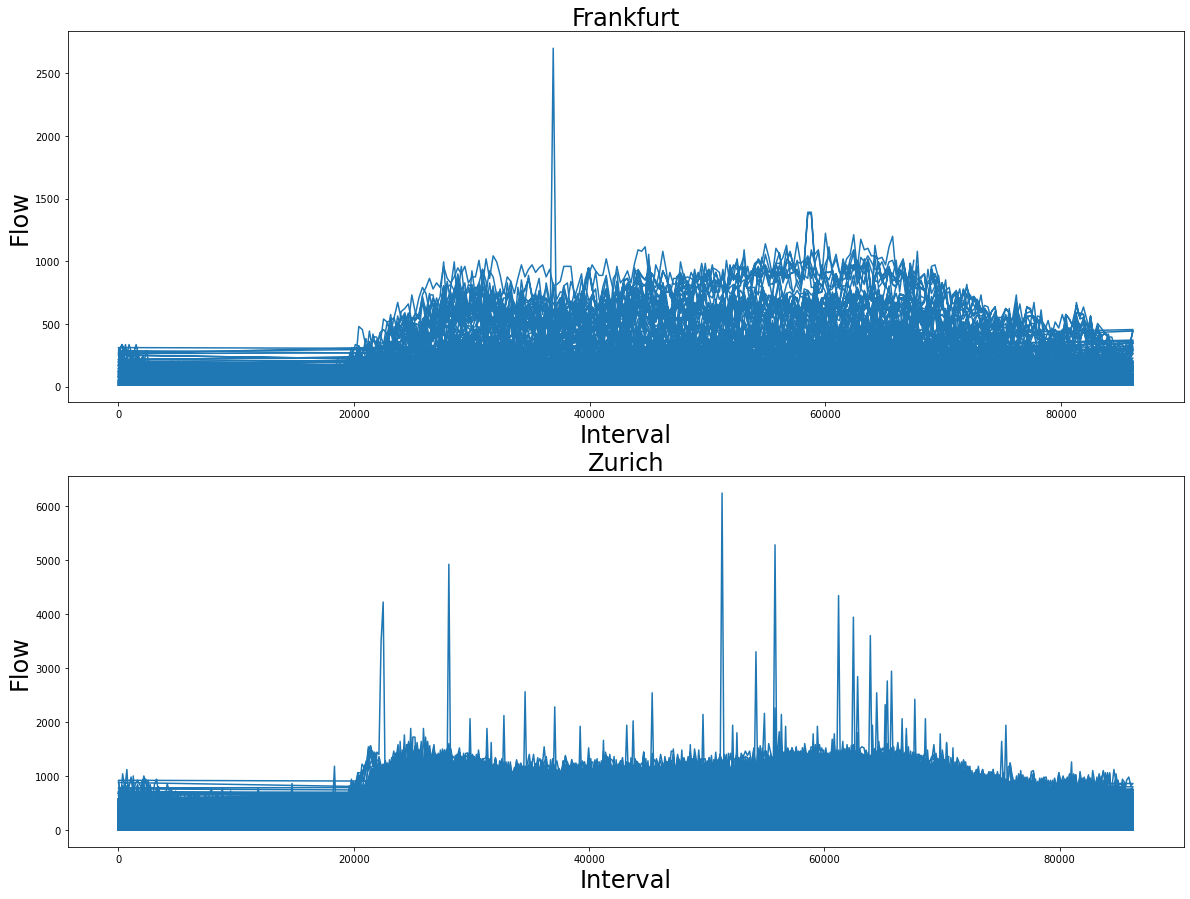

In [129]:
fig, ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(df_f['interval'], df_f['flow']);
ax[1].plot(df_z['interval'], df_z['flow']);

ax[0].set_title('Frankfurt',fontsize=24)
ax[1].set_title('Zurich',fontsize=24)

ax[0].set_ylabel('Flow',fontsize=24)
ax[0].set_xlabel('Interval',fontsize=24)

ax[1].set_ylabel('Flow',fontsize=24)
ax[1].set_xlabel('Interval',fontsize=24)

Text(0, 0.5, 'Flow')

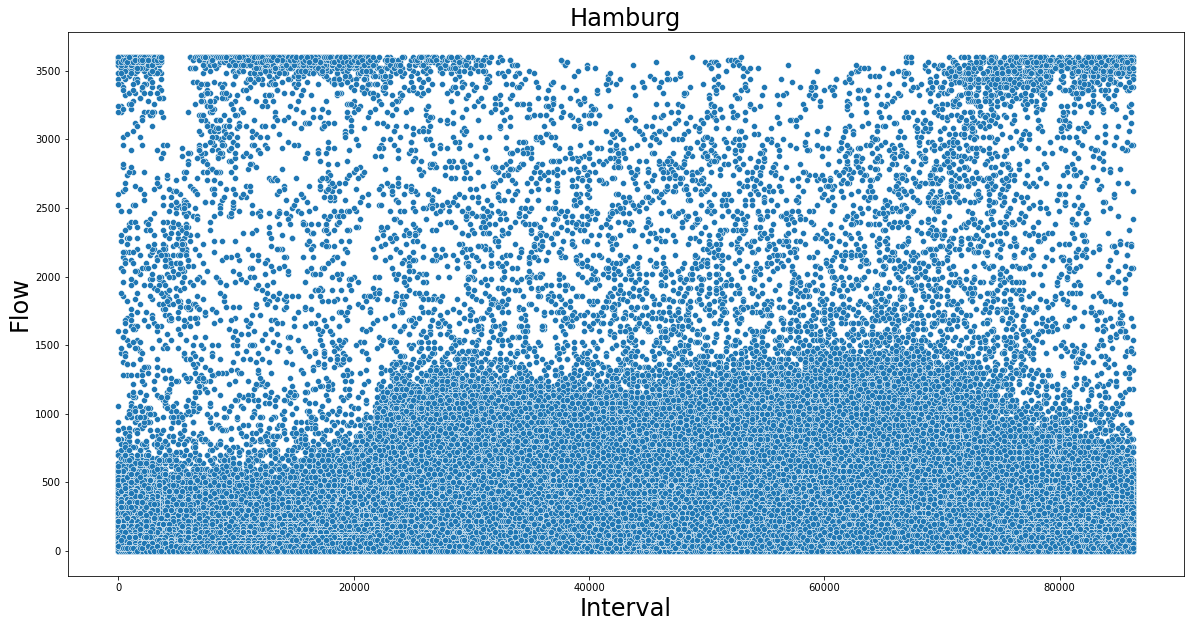

In [130]:
#matlibplot couldn't handle, therefore this one with seaborn
fig, ax = plt.subplots(1,1,figsize=(20,10))
b=sns.scatterplot(x=df_h['interval'], y=df_h['flow']);
b.axes.set_title("Hamburg",fontsize=24)
b.set_xlabel("Interval",fontsize=24)
b.set_ylabel("Flow",fontsize=24)

Text(0.5, 0, 'Interval')

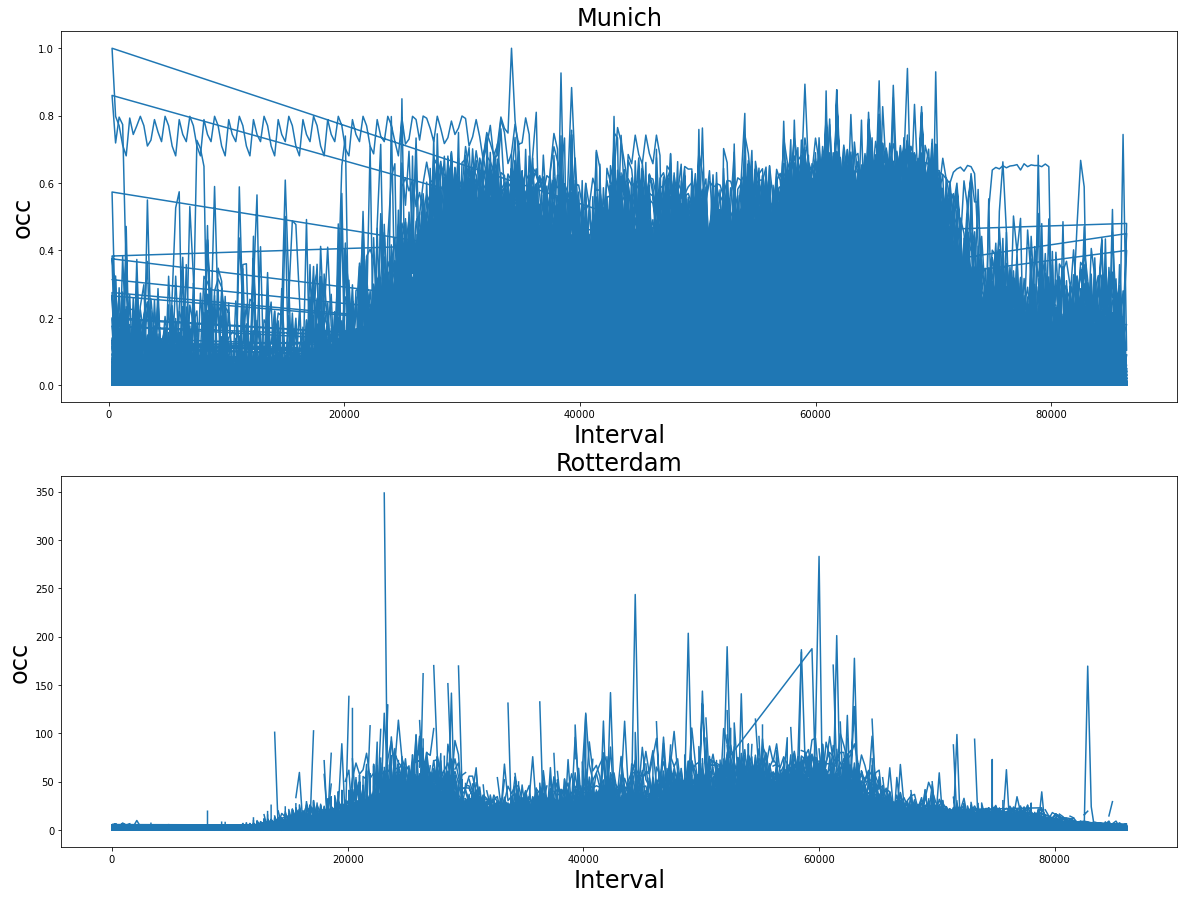

In [131]:
import seaborn as sns
fig, ax = plt.subplots(2,1,figsize=(20,15))

ax[0].plot(df_m['interval'], df_m['occ']);
ax[1].plot(df_r['interval'], df_r['occ']);

ax[0].set_title('Munich',fontsize=24)
ax[1].set_title('Rotterdam',fontsize=24)

ax[0].set_ylabel('occ',fontsize=24)
ax[0].set_xlabel('Interval',fontsize=24)

ax[1].set_ylabel('occ',fontsize=24)
ax[1].set_xlabel('Interval',fontsize=24)

Text(0.5, 0, 'Interval')

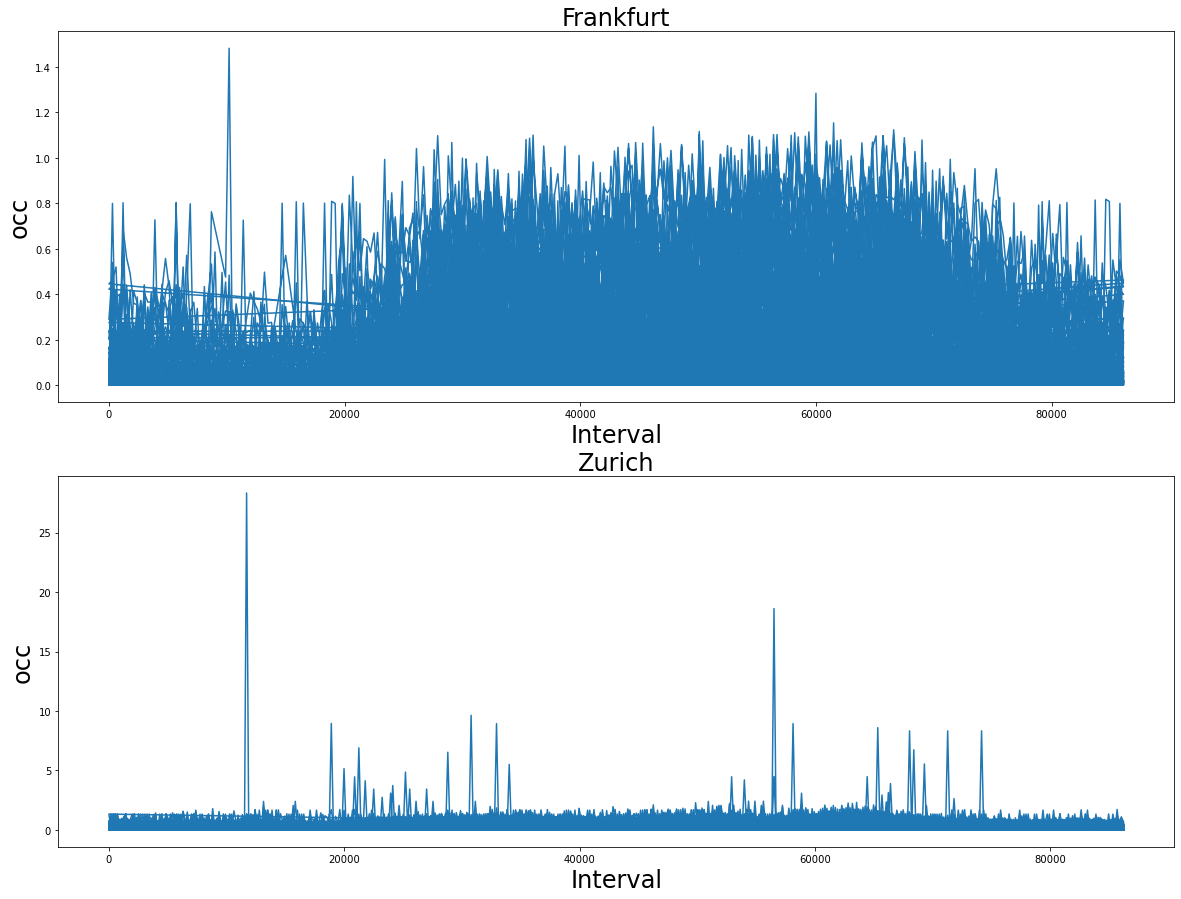

In [132]:
fig, ax = plt.subplots(2,1,figsize=(20,15))
ax[0].plot(df_f['interval'], df_f['occ']);
ax[1].plot(df_z['interval'], df_z['occ']);

ax[0].set_title('Frankfurt',fontsize=24)
ax[1].set_title('Zurich',fontsize=24)

ax[0].set_ylabel('occ',fontsize=24)
ax[0].set_xlabel('Interval',fontsize=24)

ax[1].set_ylabel('occ',fontsize=24)
ax[1].set_xlabel('Interval',fontsize=24)

Text(0, 0.5, 'occ')

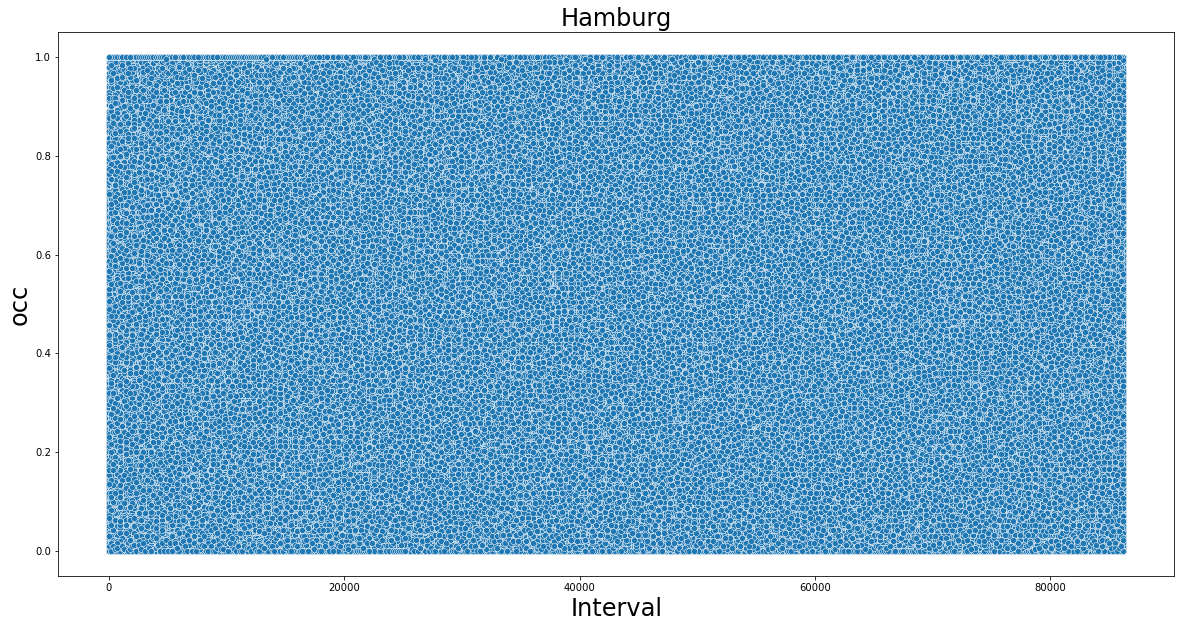

In [133]:
fig, ax = plt.subplots(1,1,figsize=(20,10))
b=sns.scatterplot(x=df_h['interval'], y=df_h['occ']);
b.axes.set_title("Hamburg",fontsize=24)
b.set_xlabel("Interval",fontsize=24)
b.set_ylabel("occ",fontsize=24)

Plots look quite fine, howwever hamburg data is still way to big to make nice plots...